In [2]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
%matplotlib inline

In [3]:
def pretty_print_response(response):
    print(json.dumps(response, indent=4, sort_keys=True))

In [56]:
load_dotenv()
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [57]:
client=plaid.Client(
    client_id=PLAID_CLIENT_ID, 
    secret=PLAID_SECRET, 
    public_key=PLAID_PUBLIC_KEY, 
    environment='sandbox')

# Get institutions
client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank ([object Object]) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'aut

In [6]:
INSTITUTION_ID = "ins_109508"


### 2. Generate a public token

In [7]:
# YOUR CODE HERE
public_tkn = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])
public_tkn

{'public_token': 'public-sandbox-8a34710c-4390-41c8-bfde-1be159b05f52',
 'request_id': 'BKTHcPkoFNchWVX'}

### 3. Exchange the public token for an access token

In [8]:
# YOUR CODE HERE
exchange_token = client.Item.public_token.exchange(public_tkn['public_token'])
exchange_token

{'access_token': 'access-sandbox-7045856c-4fb1-4be8-bcbd-270e33bbf6ae',
 'item_id': 'EQPBeMPlB1HkzEmWnADzfAPoRvbLyVtXyP1De',
 'request_id': 'MD8ZOjC5H59oTPR'}

In [9]:
access_token=exchange_token['access_token']

### 4. Fetch Accounts

In [10]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'kldQEZdzQGT6rDQzAxNrHoam1wvzGxfWbPJRp',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'lkaQEMaBQliGzwAomdPzfKdqDwyj5psZv9aAR',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'q371wg741BIWQDak4JrQtwMbGVgZzysdqb6Xy',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

### 2. Print the categories for each transaction

In [43]:
# YOUR CODE HERE
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
print(json.dumps(transaction_response['transactions'][:1],indent=4, sort_keys=True))

[
    {
        "account_id": "kldQEZdzQGT6rDQzAxNrHoam1wvzGxfWbPJRp",
        "account_owner": null,
        "amount": 89.4,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-04-11",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "SparkFun",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
     

In [47]:
for transactions in transaction_response['transactions']:
     print(json.dumps(transactions['category'], sort_keys=True))

["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Dr

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [52]:
df = pd.DataFrame(transaction_response['transactions'], columns = ['date', 'name','amount','category'])
df[['category1','category2','category3']] = pd.DataFrame(df.category.values.tolist(), index= df.index)
df.head()

,date,name,amount,category,category1,category2,category3
0,2020-04-11,SparkFun,89.40,"[Food and Drink, Restaurants]",Food and Drink,Restaurants,None
1,2020-04-10,INTRST PYMNT,-4.22,"[Transfer, Credit]",Transfer,Credit,None
2,2020-03-31,United Airlines,500.00,"[Travel, Airlines and Aviation Services]",Travel,Airlines and Aviation Services,None
3,2020-03-29,Uber,6.33,"[Travel, Taxi]",Travel,Taxi,None
4,2020-03-26,Tectra Inc,500.00,"[Food and Drink, Restaurants]",Food and Drink,Restaurants,None


In [15]:
df.drop(columns=['category', 'category2', 'category3'], inplace=True)

df.head()

,date,name,amount,category1
0,2020-04-11,SparkFun,89.40,Food and Drink
1,2020-04-10,INTRST PYMNT,-4.22,Transfer
2,2020-03-31,United Airlines,500.00,Travel
3,2020-03-29,Uber,6.33,Travel
4,2020-03-26,Tectra Inc,500.00,Food and Drink


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [16]:
df.dtypes

date          object
name          object
amount       float64
category1     object
dtype: object

In [17]:
# YOUR CODE HERE
df['date'] = pd.to_datetime(df['date'])
df['amount'] = df['amount'].astype('float')
df.dtypes

date         datetime64[ns]
name                 object
amount              float64
category1            object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [50]:
# YOUR CODE HERE
income = client.Income.get(access_token)
print(f" Previous year`s gross income : ${income['income']['last_year_income_before_tax']}")
print(f" Current monthly income : ${income['income']['income_streams'][0]['monthly_income']}")
print(f" Projected yearly income : ${income['income']['projected_yearly_income_before_tax']}")


 Previous year`s gross income : $7285
 Current monthly income : $500
 Projected yearly income : $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [55]:
# YOUR CODE HERE
total_spending_category1 = df.groupby('category1').sum()
total_spending_category1

,amount
category1,
Food and Drink,3406.59
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


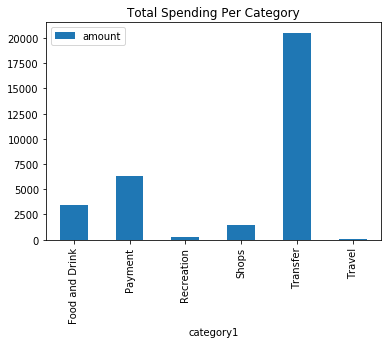

In [32]:
total_spending_category1.plot(kind="bar", title="Total Spending Per Category", legend=True)

### Calculate the expenses per month

        amount
date          
1     10649.46
2     10145.24
3     11145.24
4        85.18


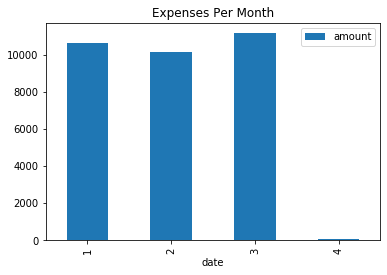

In [38]:
# YOUR CODE HERE
df.index=pd.to_datetime(df['date'])
df_by_month=df.groupby([df.index.month]).sum()
print(df_by_month)
df_by_month.plot(kind="bar", title="Expenses Per Month")